In [1]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
# первый класс
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

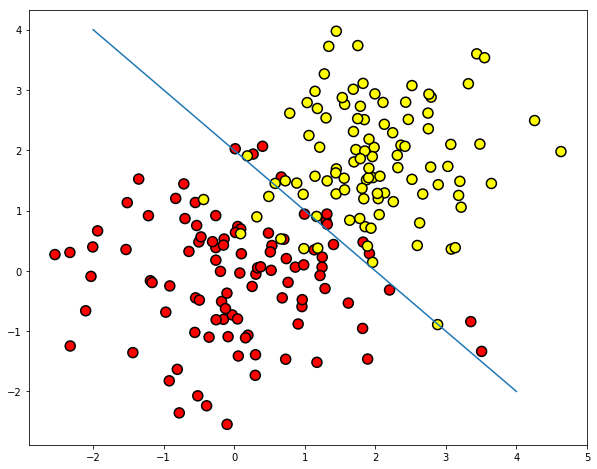

In [3]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

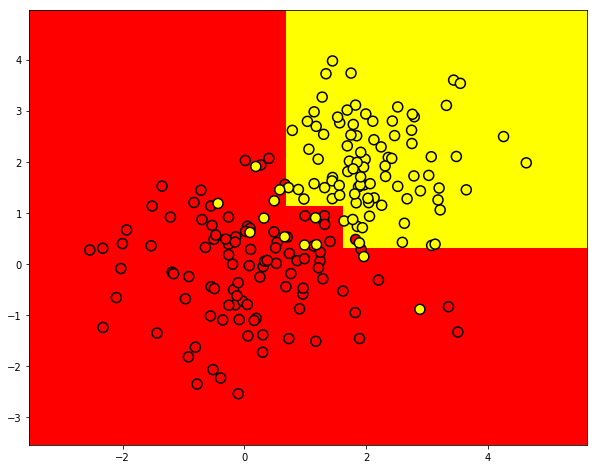

In [4]:
# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);

[Text(321.9230769230769, 380.52, 'X[1] <= 1.14\nentropy = 1.0\nsamples = 200\nvalue = [100, 100]'),
 Text(171.69230769230768, 271.8, 'X[0] <= 1.628\nentropy = 0.657\nsamples = 112\nvalue = [93, 19]'),
 Text(85.84615384615384, 163.07999999999998, 'X[1] <= 0.361\nentropy = 0.348\nsamples = 92\nvalue = [86, 6]'),
 Text(42.92307692307692, 54.360000000000014, 'entropy = 0.0\nsamples = 61\nvalue = [61, 0]'),
 Text(128.76923076923077, 54.360000000000014, 'entropy = 0.709\nsamples = 31\nvalue = [25, 6]'),
 Text(257.53846153846155, 163.07999999999998, 'X[1] <= 0.323\nentropy = 0.934\nsamples = 20\nvalue = [7, 13]'),
 Text(214.61538461538458, 54.360000000000014, 'entropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(300.46153846153845, 54.360000000000014, 'entropy = 0.414\nsamples = 12\nvalue = [1, 11]'),
 Text(472.15384615384613, 271.8, 'X[0] <= 0.696\nentropy = 0.401\nsamples = 88\nvalue = [7, 81]'),
 Text(429.23076923076917, 163.07999999999998, 'X[0] <= -0.574\nentropy = 0.946\nsamples = 11\n

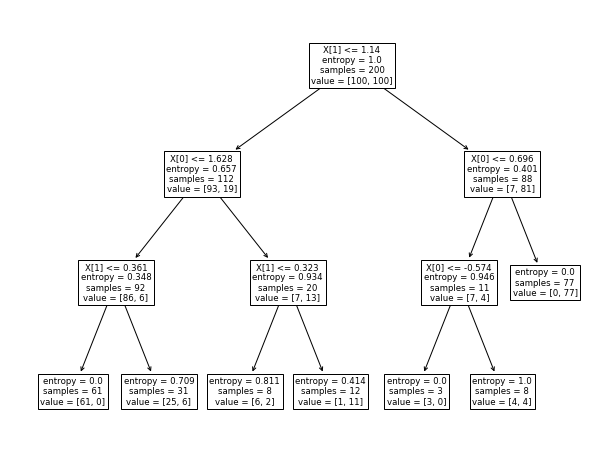

In [5]:
tree.plot_tree(clf_tree)

**Пример дерева решений в задаче регрессии**

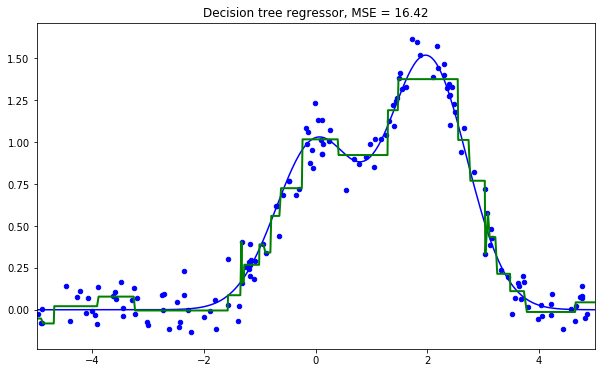

In [6]:
n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

**Деревья решений и KNN в задаче прогнозирования оттока клиентов телеком-оператора**

In [7]:
df = pd.read_csv('C:\\Users\\OCS\\Documents\\GitHub\\ds\\Datasets\\Telecom.csv')

In [8]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
df['international plan'] = pd.factorize(df['international plan'])[0]
df['voice mail plan'] = pd.factorize(df['voice mail plan'])[0]
df['churn'] = df['churn'].astype('int')
states = df['state']
y = df['churn']
df.drop(['state', 'churn', 'phone number'], axis=1, inplace=True)

In [10]:
#Выделим 70% выборки (X_train, y_train) под обучение и 30% будут отложенной выборкой (X_holdout, y_holdout). 
#отложенная выборка никак не будет участвовать в настройке параметров моделей, 
#на ней мы в конце, после этой настройки, оценим качество полученной модели. 
#Обучим 2 модели – дерево решений и kNN, пока не знаем, какие параметры хороши, 
#поэтому наугад: глубину дерева берем 5, число ближайших соседей – 10.

In [11]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier


X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3, random_state=17)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

tree.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [12]:
#Качество прогнозов будем проверять с помощью простой метрики – доли правильных ответов.
#Сделаем прогнозы для отложенной выборки.

In [13]:
from sklearn.metrics import accuracy_score


tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred)

0.94

In [14]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.881

In [15]:
#Теперь настроим параметры дерева на кросс-валидации. 
#Настраивать будем максимальную глубину и максимальное используемое на каждом разбиении число признаков. 
#Суть того, как работает GridSearchCV: для каждой уникальной пары значений параметров max_depth и max_features 
#будет проведена 5-кратная кросс-валидация и выберется лучшее сочетание параметров.

In [16]:
from sklearn.model_selection import GridSearchCV, cross_val_score


tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)

tree_grid.best_params_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    7.2s finished


{'max_depth': 6, 'max_features': 17}

In [17]:
tree_grid.best_score_

0.9425632233176168

In [18]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.946

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1, verbose=True)
knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    1.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.8s finished


({'knn__n_neighbors': 7}, 0.8859837119588513)

In [20]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.89

**Настройка случайного леса**

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=17)
print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) # 0.949

0.9494233119813256


In [22]:
forest_params = {'max_depth': range(1,11), 'max_features': range(4,19)}


forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)
forest_grid.fit(X_train, y_train)
forest_grid.best_params_, forest_grid.best_score_ # ({'max_depth': 9, 'max_features': 6}, 0.951)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  2.5min finished


({'max_depth': 9, 'max_features': 6}, 0.9511358765537934)

In [23]:
accuracy_score(y_holdout, forest_grid.predict(X_holdout)) # 0.953

0.953

**Деревья решений и метод ближайших соседей в задаче распознавания рукописных цифр MNIST**

In [24]:
from sklearn.datasets import load_digits

data = load_digits()
X_digits, y_digits = data.data, data.target

X_digits[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

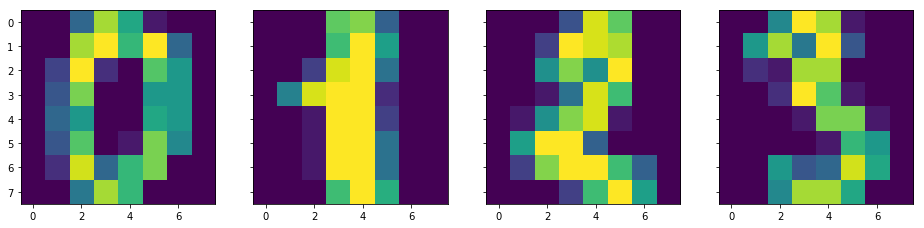

In [25]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):
    axes[i].imshow(X_digits[i,:].reshape([8,8]));

In [26]:
#Выделим 70% выборки (X_digits_train, y_digits_train) под обучение и 30% будут отложенной выборкой (X_digits_holdout, 
#y_digits_holdout).
#отложенная выборка никак не будет участвовать в настройке параметров моделей, на ней мы в конце, 
#после этой настройки, оценим качество полученной модели.

In [27]:
X_digits_train, X_digits_holdout, y_digits_train, y_digits_holdout = train_test_split(X_digits, y_digits, test_size=0.3,
random_state=17)

In [28]:
#Обучим дерево решений и kNN, опять параметры пока наугад берем.

In [29]:
tree_digits = DecisionTreeClassifier(max_depth=5, random_state=17)
knn_digits = KNeighborsClassifier(n_neighbors=10)

tree_digits.fit(X_digits_train, y_digits_train)
knn_digits.fit(X_digits_train, y_digits_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [30]:
#Сделаем прогнозы для отложенной выборки. Видим, что метод ближайших соседей справился намного лучше. 
#Но это мы пока выбирали параметры наугад. 

In [31]:
tree_digits_pred = tree_digits.predict(X_digits_holdout)
knn_digits_pred = knn_digits.predict(X_digits_holdout)
accuracy_score(y_digits_holdout, knn_digits_pred), accuracy_score(y_digits_holdout, tree_digits_pred)

(0.9740740740740741, 0.6666666666666666)

In [32]:
#Теперь так же, как раньше настроим параметры моделей на кросс-валидации, 
#только учтем, что признаков сейчас больше, чем в прошлой задаче — 64. 

In [33]:
tree_digits_params = {'max_depth':[1,2,3,5,10,20,25,30,40,50,64], 'max_features':[1,2,3,5,10,20,25,30,40,50,64]}
tree_digits_grid = GridSearchCV(tree_digits, tree_digits_params, cv=5, n_jobs=-1, verbose=True)

tree_digits_grid.fit(X_digits_train, y_digits_train)

Fitting 5 folds for each of 121 candidates, totalling 605 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 605 out of 605 | elapsed:    1.3s finished
c:\users\ocs\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 2

In [34]:
#Лучшее сочетание параметров и соответствующая средняя доля правильных ответов на кросс-валидации:

In [35]:
tree_digits_grid.best_params_, tree_digits_grid.best_score_

({'max_depth': 20, 'max_features': 40}, 0.8440731901352426)

In [36]:
#Это уже не 66%, но и не 97%. Метод ближайших соседей на этом наборе данных работает лучше. 
#В случае одного ближайшего соседа на кросс-валидации достигается почти 99% угадываний.

In [37]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_digits_train, y_digits_train, cv=5))

0.9865458422397149

In [38]:
#Обучим на этих же данных случайный лес, он на большинстве выборок работает лучше,
#чем метод ближайших соседей. Но сейчас у нас исключение. 

In [39]:
np.mean(cross_val_score(RandomForestClassifier(random_state=17), X_digits_train, y_digits_train, cv=5))

c:\users\ocs\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\ocs\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\ocs\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\ocs\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

0.9349085619110404

In [40]:
#Вывод по этому эксперименту (и общий совет): вначале проверяйте на своих данных простые модели – 
#дерево решений и метод ближайших соседей (а в следующий раз сюда добавится логистическая регрессия), 
#может оказаться, что уже они работают достаточно хорошо. 